In [11]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.ticker as tkr
import numpy as n
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_formats = ["svg"]

target_db = "dft-mot-results-and-test-items-2005-to-2020.sqlite"
con = sqlite3.connect(target_db)

In [12]:
df = pd.read_sql_query("""
    SELECT count(*) AS "Number of MOTs"
    FROM tests
""", con)
df

Number of MOTs
0       551156643

In [14]:
df = pd.read_sql_query("""
    SELECT
        strftime('%Y', test_date) as Year,
        count(*) AS "Number of MOTs"
    FROM
        tests
    GROUP BY 
        year
    ORDER BY
        year
""", con, index_col='Year')

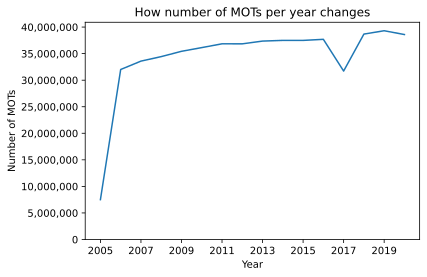

In [30]:
df.plot(legend=None)
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_ylim(ymin=0)
# ax.set_xlabel("year", size=15)
ax.set_ylabel("Number of MOTs")
ax.set_title('How number of MOTs per year changes')
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y,  p: format(int(y), ',')))
plt.savefig("charts/01 - Number of MOTs versus Year.svg", bbox_inches="tight")
plt.show()